In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

#For inline plotting 
%matplotlib inline                 
%config InlineBackend.figure_format = 'svg'

plt.style.use("seaborn-v0_8-dark") 

In [2]:
# get the data 
!wget -nc https://lazyprogrammer.me/course_files/SPY.csv

--2024-07-18 16:10:52--  https://lazyprogrammer.me/course_files/SPY.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 251935 (246K) [text/csv]
Saving to: 'SPY.csv'

SPY.csv             100%[===================>] 246.03K  1.52MB/s    in 0.2s    

2024-07-18 16:10:53 (1.52 MB/s) - 'SPY.csv' saved [251935/251935]



In [65]:
df = pd.read_csv('SPY.csv', index_col = 0, parse_dates = True)

df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [66]:
df['Log_return'] = np.log(df['Close'].pct_change()+1)

In [67]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Log_return
Date,,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600,NaN
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900,0.002644
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400,0.000704
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100,0.004212
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800,0.003322


In [68]:
# to adjust the log Returns with the buy and sell signals we shift the log returns backward one step 

df['Log_return'] = df['Log_return'].shift(-1)

df.head()

,Open,High,Low,Close,Adj Close,Volume,Log_return
Date,,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600,0.002644
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900,0.000704
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400,0.004212
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100,0.003322
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800,0.001396


Text(0, 0.5, 'Price')

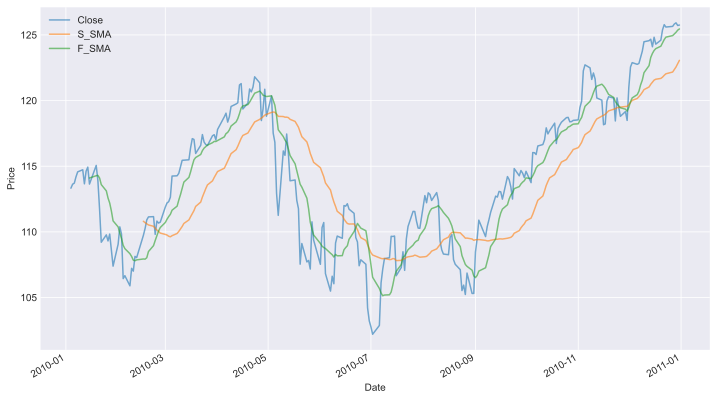

In [69]:
# Fast and Slow simple rolling averages 

df['S_SMA'] = df['Close'].rolling(30).mean()
df['F_SMA'] = df['Close'].rolling(10).mean()

df[['Close', 'S_SMA', 'F_SMA']].iloc[:252].plot(alpha = 0.6, figsize = (12,7))

plt.grid()
plt.ylabel('Price')

In [70]:
# Signal to indicate when Fast SMA > Slow SMA 

df['Signal'] = np.where(df['F_SMA'] >= df['S_SMA'], 1, 0)

df.iloc[80:].head(10)

,Open,High,Low,Close,Adj Close,Volume,Log_return,S_SMA,F_SMA,Signal
Date,,,,,,,,,,
2010-04-29,120.099998,121.110001,120.070000,120.860001,98.780228,193775000,-0.017107,118.891334,120.360999,1
2010-04-30,120.879997,121.010002,118.779999,118.809998,97.104759,270000900,0.012879,118.950333,120.305999,1
2010-05-03,119.379997,120.680000,119.199997,120.349998,98.363426,182747900,-0.023796,119.096333,120.359999,1
2010-05-04,119.010002,119.029999,116.919998,117.519997,96.050430,360353400,-0.005974,119.127333,120.023999,1
2010-05-05,116.559998,117.800003,115.970001,116.820000,95.478325,328973200,-0.033778,119.107667,119.639999,1
2010-05-06,116.260002,117.000000,105.000000,112.940002,92.307137,647356600,-0.014987,118.977667,118.831999,0
2010-05-07,112.639999,113.769997,109.410004,111.260002,90.934059,637558800,0.043099,118.798000,117.777000,0
2010-05-10,115.809998,116.650002,114.910004,116.160004,94.938896,396159600,-0.002845,118.784000,117.258000,0
2010-05-11,115.070000,117.360001,114.910004,115.830002,94.669189,317849800,0.013889,118.734334,116.993000,0


In [71]:
# shift the signal forward to set it to previous signal column for each time stamp 

df['PrevSignal'] = df['Signal'].shift(1)

# buy and sell signals 

df['Buy'] = (df['PrevSignal'] == 0) & (df['Signal'] == 1) # F_SMA < S_SMA -> F_SMA > S_SMA
df['Sell'] = (df['PrevSignal'] == 1) & (df['Signal'] == 0) # F_SMA > S_SMA -> F_SMA < S_SMA

In [72]:
df.iloc[80:].head(10)

,Open,High,Low,Close,Adj Close,Volume,Log_return,S_SMA,F_SMA,Signal,PrevSignal,Buy,Sell
Date,,,,,,,,,,,,,
2010-04-29,120.099998,121.110001,120.070000,120.860001,98.780228,193775000,-0.017107,118.891334,120.360999,1,1.0,False,False
2010-04-30,120.879997,121.010002,118.779999,118.809998,97.104759,270000900,0.012879,118.950333,120.305999,1,1.0,False,False
2010-05-03,119.379997,120.680000,119.199997,120.349998,98.363426,182747900,-0.023796,119.096333,120.359999,1,1.0,False,False
2010-05-04,119.010002,119.029999,116.919998,117.519997,96.050430,360353400,-0.005974,119.127333,120.023999,1,1.0,False,False
2010-05-05,116.559998,117.800003,115.970001,116.820000,95.478325,328973200,-0.033778,119.107667,119.639999,1,1.0,False,False
2010-05-06,116.260002,117.000000,105.000000,112.940002,92.307137,647356600,-0.014987,118.977667,118.831999,0,1.0,False,True
2010-05-07,112.639999,113.769997,109.410004,111.260002,90.934059,637558800,0.043099,118.798000,117.777000,0,0.0,False,False
2010-05-10,115.809998,116.650002,114.910004,116.160004,94.938896,396159600,-0.002845,118.784000,117.258000,0,0.0,False,False
2010-05-11,115.070000,117.360001,114.910004,115.830002,94.669189,317849800,0.013889,118.734334,116.993000,0,0.0,False,False


In [73]:
# helper function to assign at each time step whether we are invested or not 

is_invested = False

def assign_is_invested(row):
    
    global is_invested
    
    # if is_invested is True and Sell signal is True
    if is_invested and row['Sell']:
        
        # we are not invested
        is_invested = False
    # if is_invested is not True and buy signal is true
    
    if not is_invested and row['Buy']:
        
        # we are invested
        is_invested = True
    # otherwise, remain the same     
    return is_invested

df['Invested'] = df.apply(assign_is_invested, axis = 1)

In [74]:
# Strategy log return is just the multiplicattion of the days we are invested times shifted log returns we generated

df['S_Log_return'] = df['Invested'] * df['Log_return']

In [76]:
# Total Strategy return 

df['S_Log_return'].sum()

0.3049019540291437

In [77]:
# Total buy and hold return 

df['Log_return'].sum()

0.7821162403084022

We see that if we just buy from the initial time and hold the asset we would make much more money. Lets calculate the risk associated with our strategy and sharpe ratio with respect to buy and hold strategy. 

In [78]:
s_risk = df['S_Log_return'].std()
s_sr = df['S_Log_return'].mean()/s_risk

bh_risk = df['Log_return'].std()
bh_sr = df['Log_return'].mean()/bh_risk

print(f"Risks associated with our strategy vs buy and hold: {s_risk:.5f} vs {bh_risk:.5f}")
print(f"Sharpe ratio associated with our strategy vs buy and hold: {s_sr:.5f} vs {bh_sr:.5f}")


print()

Risks associated with our strategy vs buy and hold: 0.00609 vs 0.00945
Sharpe ratio associated with our strategy vs buy and hold: 0.02213 vs 0.03660



Although our strategy has lower risk, buy and hold is superior in terms of the Sharpe ratio! 

### Optimizing the strategy hyper-parameters 
-----

By splitting the data into a train and test set, we are going to use the train set to select fastest and slowest window parameters for SMA and then we will evaluate it on both train and test set. Here we can treat the test set as a validation set

In [63]:
# test set split idx 
N_val = 1000

def trend_following(df, fast_w, slow_w):
    
    # Log returns 
    df['Log_return'] = np.log(df['Close'].pct_change()+1)
    df['Log_return'] = df['Log_return'].shift(-1) # shift to align with buy and sell signals 
    
    df['S_SMA'] = df['Close'].rolling(slow_w).mean()
    df['F_SMA'] = df['Close'].rolling(fast_w).mean()
    
    # Signal when Fast >= Slow and the prev signal
    df['Signal'] = np.where(df['F_SMA'] >= df['S_SMA'], 1, 0)
    df['PrevSignal'] = df['Signal'].shift(1)

    # buy and sell signals 

    df['Buy'] = (df['PrevSignal'] == 0) & (df['Signal'] == 1) # F_SMA < S_SMA -> F_SMA > S_SMA
    df['Sell'] = (df['PrevSignal'] == 1) & (df['Signal'] == 0) # F_SMA > S_SMA -> F_SMA < S_SMA
    
    # split the data 
    
    train = df[:-N_val].copy()
    val = df[-N_val:].copy()
    
    global is_invested
    
    
    # Invested flags for train and val sets 
    is_invested = False
    train['Invested'] = train.apply(assign_is_invested, axis = 1)
    train['S_Log_return'] = train['Invested'] * train['Log_return']
    
    is_invested = False 
    val['Invested'] = val.apply(assign_is_invested, axis = 1)
    val['S_Log_return'] = val['Invested'] * val['Log_return']
    
    return train, val, train['S_Log_return'][:-1].sum(), val['S_Log_return'][:-1].sum()



In [79]:
# Sanity checks 

new_df = pd.read_csv('SPY.csv', index_col = 0, parse_dates = True)

trend_following(new_df,10,30)[2] + trend_following(new_df,10,30)[3] == df['S_Log_return'].sum()

True

In [91]:
# grid search 

best_fast_w = None
best_slow_w = None
best_cum_return = float('-inf')

for fast_w in range(3,30):
    for slow_w in range(fast_w+5,80):
        
        cum_return, _  = trend_following(new_df, fast_w, slow_w)[-2:] # hyperparameter tuning using the training cumulative return
        if cum_return > best_cum_return:
            
            best_fast_w = fast_w
            best_slow_w = slow_w
            
            best_cum_return = cum_return
   
# tuned results 
print(f'For Best slow and fast moving windows: {best_slow_w} and {best_fast_w}\n')
print(f"Cumulative Log returns for trend following strategy in the train and val sets are: {trend_following(new_df, best_fast_w, best_slow_w)[2]:.5f} and {trend_following(new_df, best_fast_w, best_slow_w)[3]:.5f}")      

For Best slow and fast moving windows: 33 and 16

Cumulative Log returns for trend following strategy in the train and test sets are: 0.43459 and 0.08889


In [92]:
train, val = trend_following(new_df, best_fast_w, best_slow_w)[:2]

# total cumulative Log Return for buy and hold 

train_cum_lr = train['Log_return'][:-1].sum()
val_cum_lr = val['Log_return'][:-1].sum() # last value in the full df is NaN as we shifted the Log_returns, so we set -1 for the training set just for the sake of uniformity

# SR algo vs buy and hold strategy train

bh_risk_train = train['Log_return'].std()
bh_sr_train = train['Log_return'].mean()/bh_risk_train

bh_risk_val = val['Log_return'].std()
bh_sr_val = val['Log_return'].mean()/bh_risk_val

s_risk_train = train['S_Log_return'].std()
s_sr_train = train['S_Log_return'].mean()/s_risk_train

s_risk_val = val['S_Log_return'].std()
s_sr_val = val['S_Log_return'].mean()/s_risk_val

print(f"Total cumulative Log return for Buy and Hold, for train {train_cum_lr:.5f} and validation set {val_cum_lr:.5f}")
print(f"Sharpe ratio associated with our strategy vs buy and hold for train set: {s_sr_train:.5f} vs {bh_sr_train:.5f}")
print(f"Sharpe ratio associated with our strategy vs buy and hold for validation set: {s_sr_val:.5f} vs {bh_sr_val:.5f}")

Total cumulative Log return for Buy and Hold, for train 0.59709 and validation set 0.19308
Sharpe ratio associated with our strategy vs buy and hold for train set: 0.04949 vs 0.04643
Sharpe ratio associated with our strategy vs buy and hold for validation set: 0.01618 vs 0.02238


 - We see that the buy and hold strategy again outperforms the tuned trend following strategy as far as cumulative returns are concerned.
 - Trend following strategy has a larger sharpe ratio on the training set, so at least reduce risk by not being invested all the time. However the same is not true for the validation set, buy and hold strategy still out-performs our trend following strategy. 

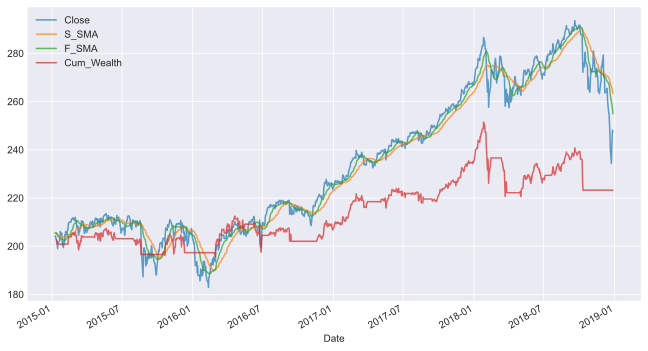

In [96]:
# Wealth over time on the validation set 

val['Cum_Log_return'] = val['S_Log_return'].cumsum().shift(1) # shift forward again as we shifted Log returns backwards earlier 

val['Cum_Wealth'] = val['Close'][0] * np.exp(val['Cum_Log_return'])

val[['Close', 'S_SMA', 'F_SMA', 'Cum_Wealth']].plot(alpha = 0.7, figsize = (11,6))

plt.grid()

Straight lines indicates starts when our trend following strategy decides to sell and end when it decides to buy. It seems like our algorithm does not react quickly, in particular, we start investing after the stock rises and selling after the stock drops!

- Trying exponential mocing average might help as it is know the lag less as compared to the simple moving average. Remember that it does so by giving weights to more recent values more than the ones in the far past!!!

### Machine Learning-Based Strategy
-----

- The trend-following strategy can be considered as having hyperparameters but it does not incorporate any parameters in the sense that there is no learning nor a statistical model is involved in the strategy. 

- Now we will be considering a ML based strategy by building a predictive model of future stock returns that may be able to help us trade better. 

Noting the difficulty of predicting future stock returns, especially in a multi-step setting, this approach might be plausible if we just predict one day into the future as we update our positions daily. Can use all the data up to current time step, and predict tomorrow's return. 

**Our Model**:

- We will decide to buy/sell/do nothing based on return prediction
- We will not use autoregressive model 
- Instead we will use the returns from the 500 stocks that makes us S&P 500 index (SPY) to predict the index's return. It is just a plausible idea that is worth trying. In the end, predictive modelling is all about the data, no matter how complex your model is if your are working with the wrong (non-predictive) data you will be sorry.
- Of course it is hard to work with 500 stocks, so we will consider a small subset of stocks that has the largest market cap. 

In [106]:
# get data 

!wget -nc https://lazyprogrammer.me/course_files/sp500_closefull.csv

--2024-07-19 12:49:36--  https://lazyprogrammer.me/course_files/sp500_closefull.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18464866 (18M) [text/csv]
Saving to: 'sp500_closefull.csv'

sp500_closefull.csv 100%[===================>]  17.61M  12.5MB/s    in 1.4s    

2024-07-19 12:49:39 (12.5 MB/s) - 'sp500_closefull.csv' saved [18464866/18464866]



In [156]:
sp500_df = pd.read_csv('sp500_closefull.csv', index_col = 0, parse_dates = True)

sp500_df.head()

,CSCO,UAL,TROW,ISRG,PRGO,TPR,DVN,MRO,BA,VRTX,...,M,CRM,PGR,WAT,BWA,LRCX,NWL,UAA,BLK,PPL
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,24.690001,12.80,54.400002,102.923332,40.349998,36.310001,76.570000,19.153616,56.180000,44.240002,...,17.059999,18.705000,18.030001,61.630001,16.889999,39.880001,15.20,3.51000,238.580002,30.242558
2010-01-05,24.580000,13.91,55.009998,102.459999,38.790001,36.750000,76.650002,19.171511,58.020000,42.779999,...,16.860001,18.625000,17.969999,60.790001,17.695000,39.610001,15.11,3.61500,239.610001,29.851370
2010-01-06,24.420000,13.27,54.150002,103.946663,38.299999,37.470001,76.419998,19.595024,59.779999,42.029999,...,17.100000,18.592501,17.790001,60.900002,18.344999,39.430000,15.38,3.69500,234.669998,29.916569
2010-01-07,24.530001,13.55,54.110001,103.556664,37.990002,37.490002,75.970001,19.475725,62.200001,41.500000,...,17.490000,18.510000,17.549999,61.160000,18.594999,39.360001,15.82,3.65125,237.250000,29.627834
2010-01-08,24.660000,13.33,53.900002,102.986664,37.779999,37.270000,76.120003,19.505550,61.599998,40.669998,...,16.920000,18.537500,17.709999,61.209999,18.254999,40.349998,15.77,3.64375,238.919998,29.534695


In [157]:
sp500_df.dropna(axis = 0, how = 'all', inplace = True) # drop all the non-trading days how='all' to make sure when all the columns for the row is missing

In [158]:
sp500_df.shape

(2263, 480)

In [159]:
# drop also columns (stocks) with any missing vals, to not to bother with ffill/bfill

sp500_df.dropna(axis = 1, how = 'any', inplace = True)

In [160]:
sp500_df.isna().sum().sum()

0

In [161]:
# log returns df 

sp500_ret_df = np.log(sp500_df.pct_change()+1)

In [163]:
# SPY returns 

sp500_ret_df['SPY']

Date
2010-01-04         NaN
2010-01-05    0.002644
2010-01-06    0.000704
2010-01-07    0.004212
2010-01-08    0.003322
                ...   
2018-12-21   -0.026525
2018-12-24   -0.026778
2018-12-26    0.049290
2018-12-27    0.007648
2018-12-28   -0.001291
Name: SPY, Length: 2263, dtype: float64

In [164]:
# we shift SPY return 1 step back again so that the target return we want to predict is the next days SPY returns 

sp500_ret_df['SPY'] = sp500_ret_df['SPY'].shift(-1)

sp500_ret_df[['SPY']].head()

,SPY
Date,
2010-01-04,0.002644
2010-01-05,0.000704
2010-01-06,0.004212
2010-01-07,0.003322
2010-01-08,0.001396


In [165]:
# now the last value of the target is missing 
sp500_ret_df[['SPY']].tail()

,SPY
Date,
2018-12-21,-0.026778
2018-12-24,0.049290
2018-12-26,0.007648
2018-12-27,-0.001291
2018-12-28,NaN


In [166]:
# next we split train and val set 

N_val = 1000

train = sp500_ret_df[1:-N_val] # we skip the first row as we do not have feautres of stocks that make up sp500 is missing 
val = sp500_ret_df[-N_val:-1] # we skip the last row of the val as the last target val of SPY returns is missing

In [168]:
sp500_ret_df['GOOGL']

Date
2010-01-04         NaN
2010-01-05   -0.004413
2010-01-06   -0.025532
2010-01-07   -0.023555
2010-01-08    0.013243
                ...   
2018-12-21   -0.032095
2018-12-24   -0.006660
2018-12-26    0.062189
2018-12-27    0.004808
2018-12-28   -0.005925
Name: GOOGL, Length: 2263, dtype: float64

In [257]:
# some feature stocks with large market cap 

feat_cols = ['AAPL', 'MSFT', 'NVDA', 'AMZN', 'JNJ', 'V', 'PG', 'JPM'] 

In [262]:
X_train, y_train = train[feat_cols], train['SPY']
X_val, y_val = val[feat_cols], val['SPY']

X_train.head()

,AAPL,MSFT,NVDA,AMZN,JNJ,V,PG,JPM
Date,,,,,,,,
2010-01-05,0.001727,0.000323,0.014497,0.005883,-0.011663,-0.011525,0.000327,0.019185
2010-01-06,-0.016034,-0.006156,0.006376,-0.018282,0.008101,-0.013519,-0.004755,0.005479
2010-01-07,-0.001850,-0.010454,-0.019792,-0.017160,-0.007163,0.009264,-0.005438,0.019615
2010-01-08,0.006626,0.006873,0.002159,0.026717,0.003432,0.002762,-0.001323,-0.002459
2010-01-11,-0.008861,-0.012802,-0.014115,-0.024335,0.000156,-0.002878,-0.003979,-0.003363


In [263]:
y_train.head()

Date
2010-01-05    0.000704
2010-01-06    0.004212
2010-01-07    0.003322
2010-01-08    0.001396
2010-01-11   -0.009370
Name: SPY, dtype: float64

In [264]:
# Linear Regression 

from sklearn.linear_model import LinearRegression as LR 

model = LR()

model.fit(X_train, y_train)

# train R^2 score 
model.score(X_train, y_train)

0.008283035564387586

In [265]:
model.score(X_val, y_val)

-0.010968592544794875

Predicting the average value would be zero, and of course a perfect score would be 1: 

$$ R^2  =  1 - \frac{\textrm{Unexplained Variance}}{\textrm{Total Variance}}$$

which is given by 

$$ R^2  =  1 - \frac{\textrm{RSS}}{\textrm{TSS}} = 1 - \frac{\sum (\hat{y}_i - y_i)^2}{\sum (y_i - \bar{y})^2} $$

Predicting the average of next days SPY return would be like a naive prediction. For the train set we are slightly above the naive prediction, for the validation set we are doing worse than the naive prediction. 

Recall that we actually dont care about the value of the prediction, instead care about whether it is positive or negative. 

In [266]:
# Accuracy of direction predictions 

pred_train, pred_val = model.predict(X_train), model.predict(X_val)

train_acc, val_acc = np.mean(np.sign(pred_train) == np.sign(y_train)), np.mean(np.sign(pred_val) == np.sign(y_val)) 


print(f'Accuracy of direction predictions on train: {train_acc:.3f}')
print(f'Accuracy of direction predictions on val: {val_acc:.3f}')



Accuracy of direction predictions on train: 0.532
Accuracy of direction predictions on val: 0.529


In [267]:
# Sign function would return 0 if the return predictions are actually zero, so check this to make sure 
# no zero within the set 

set(np.sign(pred_train)), set(np.sign(pred_val))

({-1.0, 1.0}, {-1.0, 1.0})

In [268]:
# based on our predictions we take a position which determines whether we are invested or not 
# if our prediction for the next days SPY return is positive we buy, if it is negative we sell 

sp500_ret_df['Position'] = 0

sp500_ret_df['Position'][1:-N_val] = (pred_train > 0)
sp500_ret_df['Position'][-N_val:-1]= (pred_val > 0)

sp500_ret_df.head()

/var/folders/q0/lz7h2q596yx70_f664l6gv8h0000gn/T/ipykernel_54245/2592706365.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500_ret_df['Position'][1:-N_val] = (pred_train > 0)


,CSCO,UAL,TROW,ISRG,PRGO,TPR,DVN,MRO,BA,VRTX,...,NWL,UAA,BLK,PPL,Position,MLS_Log_return,Position_Logreg,MLS_Log_return_Logreg,Position_rf,MLS_Log_return_rf
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN
2010-01-05,-0.004465,0.083163,0.011151,-0.004512,-0.039429,0.012045,0.001044,0.000934,0.032227,-0.033559,...,-0.005939,0.029476,0.004308,-0.013019,False,0.0,True,0.000704,True,0.000704
2010-01-06,-0.006531,-0.047102,-0.015757,0.014405,-0.012713,0.019402,-0.003005,0.021850,0.029883,-0.017687,...,0.017711,0.021889,-0.020832,0.002182,True,0.004212,True,0.004212,True,0.004212
2010-01-07,0.004494,0.020881,-0.000739,-0.003759,-0.008127,0.000534,-0.005906,-0.006107,0.039684,-0.012690,...,0.028207,-0.011911,0.010934,-0.009698,True,0.003322,True,0.003322,True,0.003322
2010-01-08,0.005286,-0.016369,-0.003889,-0.005519,-0.005543,-0.005886,0.001973,0.001530,-0.009693,-0.020203,...,-0.003166,-0.002056,0.007014,-0.003149,False,0.0,True,0.001396,True,0.001396


In [269]:
# ML strategy Log returns as a seperate column

sp500_ret_df['MLS_Log_return'] = sp500_ret_df['Position'] * sp500_ret_df['SPY']

In [270]:
# Total ML strategy returns 

bh_cum_lreturn_train = y_train.sum()
bh_cum_lreturn_val =  y_val.sum()

mls_cum_lreturn_train = sp500_ret_df.iloc[1:-N_val]['MLS_Log_return'].sum()
mls_cum_lreturn_val =  sp500_ret_df.iloc[-N_val:-1]['MLS_Log_return'].sum()

print(f"Total cumulative Log return for Buy and Hold strategy for train {bh_cum_lreturn_train:.5f} and validation set {bh_cum_lreturn_val:.5f}")
print(f"Total cumulative Log return for ML based strategy for train {mls_cum_lreturn_train:.5f} and validation set {mls_cum_lreturn_val:.5f}")

Total cumulative Log return for Buy and Hold strategy for train 0.58640 and validation set 0.19308
Total cumulative Log return for ML based strategy for train 0.53918 and validation set 0.31187


Now we see that we can beat the simple buy and hold strategy with a predictive model! 

#### Framing the predictions as a Classification problem
------

In [271]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(C = 10) #regularization penalty to avoid to large weights 

cy_train = (y_train > 0)
cy_val = (y_val > 0)

logreg_model.fit(X_train, cy_train)

logreg_model.score(X_train, cy_train), logreg_model.score(X_val, cy_val)

(0.5586370839936609, 0.5295295295295295)

Logistic model does slightly better the Linear Regression on the training set and as good as the latter for the validation set!

In [272]:
# Assing the position to take depending on the predictions 

pred_train_logistic = logreg_model.predict(X_train)
pred_val_logistic = logreg_model.predict(X_val)

sp500_ret_df.loc[1:len(sp500_ret_df)-N_val, 'Position_Logreg'] = pred_train_logistic
sp500_ret_df.loc[len(sp500_ret_df)-N_val:-1, 'Position_Logreg']= pred_val_logistic

sp500_ret_df['MLS_Log_return_Logreg'] = sp500_ret_df['Position_Logreg'] * sp500_ret_df['SPY']

/var/folders/q0/lz7h2q596yx70_f664l6gv8h0000gn/T/ipykernel_54245/963782206.py:6: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  sp500_ret_df.loc[1:len(sp500_ret_df)-N_val, 'Position_Logreg'] = pred_train_logistic
/var/folders/q0/lz7h2q596yx70_f664l6gv8h0000gn/T/ipykernel_54245/963782206.py:7: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  sp500_ret_df.loc[len(sp500_ret_df)-N_val:-1, 'Position_Logreg']= pred_val_logistic


In [273]:
# Total ML strategy (with Logistic regression) returns 

bh_cum_lreturn_train = y_train.sum()
bh_cum_lreturn_val =  y_val.sum()

mls2_cum_lreturn_train = sp500_ret_df['MLS_Log_return_Logreg'].iloc[1:len(sp500_ret_df)-N_val].sum()
mls2_cum_lreturn_val =  sp500_ret_df['MLS_Log_return_Logreg'].iloc[len(sp500_ret_df)-N_val:-1].sum()

print(f"Total cumulative Log return for Buy and Hold strategy for train {bh_cum_lreturn_train:.5f} and validation set {bh_cum_lreturn_val:.5f}")
print(f"Total cumulative Log return for ML based strategy (Logistic Regression) for train {mls2_cum_lreturn_train:.5f} and validation set {mls2_cum_lreturn_val:.5f}")

Total cumulative Log return for Buy and Hold strategy for train 0.58640 and validation set 0.19308
Total cumulative Log return for ML based strategy (Logistic Regression) for train 0.59057 and validation set 0.20097


#### Using More powerful Classifier: Random Forest Classifier 
----

In [274]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state = 0)

rf_model.fit(X_train, cy_train)

rf_model.score(X_train, cy_train), rf_model.score(X_val, cy_val)

(1.0, 0.5255255255255256)

Random Forests are strong non-linear models prone to overfitting! It fits perfectly to training data 

In [275]:
# Assing the position to take depending on the predictions 

pred_train_rf = rf_model.predict(X_train)
pred_val_rf = rf_model.predict(X_val)

sp500_ret_df.loc[1:len(sp500_ret_df)-N_val, 'Position_rf'] = pred_train_rf
sp500_ret_df.loc[len(sp500_ret_df)-N_val:-1, 'Position_rf']= pred_val_rf

sp500_ret_df['MLS_Log_return_rf'] = sp500_ret_df['Position_rf'] * sp500_ret_df['SPY']

/var/folders/q0/lz7h2q596yx70_f664l6gv8h0000gn/T/ipykernel_54245/1804205648.py:6: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  sp500_ret_df.loc[1:len(sp500_ret_df)-N_val, 'Position_rf'] = pred_train_rf
/var/folders/q0/lz7h2q596yx70_f664l6gv8h0000gn/T/ipykernel_54245/1804205648.py:7: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  sp500_ret_df.loc[len(sp500_ret_df)-N_val:-1, 'Position_rf']= pred_val_rf


In [276]:
# Total ML strategy (with Random Forest) returns 

bh_cum_lreturn_train = y_train.sum()
bh_cum_lreturn_val =  y_val.sum()

mls3_cum_lreturn_train = sp500_ret_df['MLS_Log_return_rf'].iloc[1:len(sp500_ret_df)-N_val].sum()
mls3_cum_lreturn_val =  sp500_ret_df['MLS_Log_return_rf'].iloc[len(sp500_ret_df)-N_val:-1].sum()

print(f"Total cumulative Log return for Buy and Hold strategy for train {bh_cum_lreturn_train:.5f} and validation set {bh_cum_lreturn_val:.5f}")
print(f"Total cumulative Log return for ML based strategy (Random Forest Classifier) for train {mls3_cum_lreturn_train:.5f} and validation set {mls3_cum_lreturn_val:.5f}")

Total cumulative Log return for Buy and Hold strategy for train 0.58640 and validation set 0.19308
Total cumulative Log return for ML based strategy (Random Forest Classifier) for train 4.70650 and validation set 0.26625
